# CSCE 623 Homework Assignment 1
## Student Name: David Crow
## Date: 13 April 2019


In [2]:
"""
HW1
"""

import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

## STEP 1:
load Auto.csv using pandas and preprocess it (handle missing values)

In [3]:
#STEP 1

#STUDENT CODE - insert code to load Auto.csv using pandas and preprocess it (handle missing values)
# store your data in a dataframe called 'data'
#---------------------------------------------    

# N/A values are represented by ?; get rid of these N/A values
data = pd.read_csv("Auto.csv", na_values='?').dropna()

#---------------------------------------------    

#show the dataset was loaded by displaying first few rows
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## STEP 2:
Explore the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1710b978>,
      dtype=object)

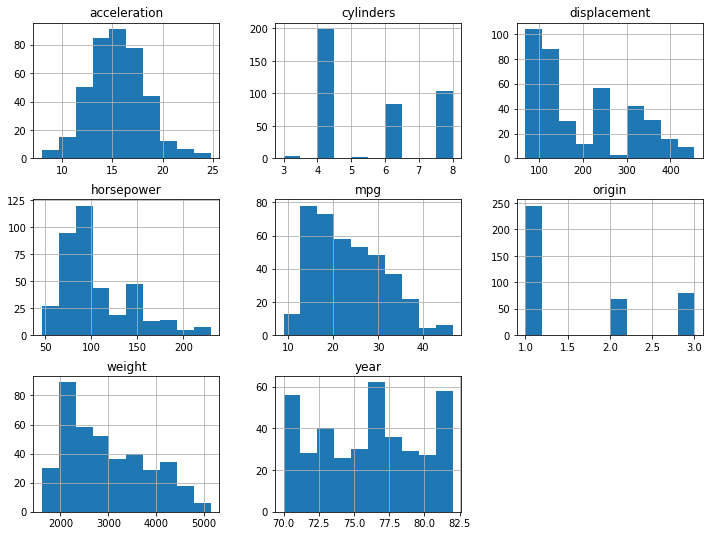

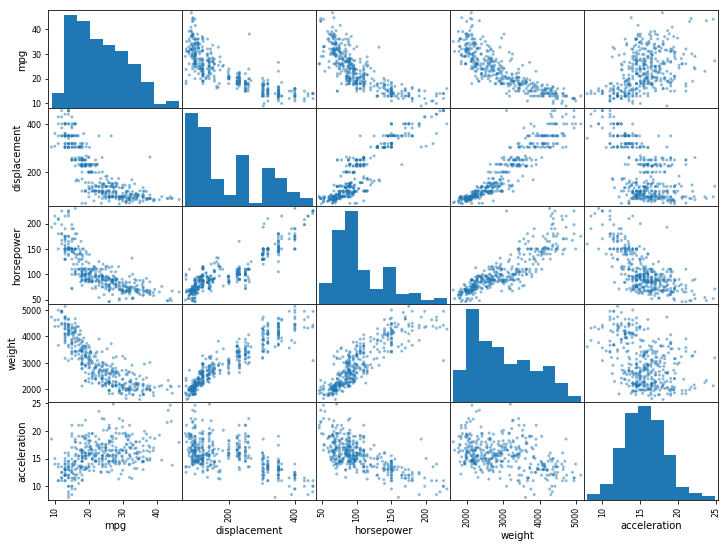

In [4]:
#STEP 2

#STUDENT CODE - Insert code to explore the dataset here
#---------------------------------------------

data.info()

# histogram was fairly small; found figsize param here:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
data.hist(figsize=(12,9))

attributes = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
scatter_matrix(data[attributes], figsize=(12,9))

#---------------------------------------------      

#### a. Dataset stats:

There are nine features in the dataset. Four are of type float64, and four are of type int64. In total, then, eight of the features are numerical in nature.

After removing the handful of rows with at least one '?' entry, the dataset contains 392 observations.

#### b. Feature descriptions:

Acceleration seems to follow a normal distribution.
Cylinders and Origin contain discrete values.
Displacement, Horsepower, MPG, Weight, and Year seem to follow non-normal distributions.

More specifically, MPG and Weight seem to follow skewed distributions. One could argue that Year is multi-modal. Displacement might also be multi-modal. Horsepower seems skewed with, but it also includes a handful of outliers.

#### c. Feature relationships:

Each pair of features in {Displacement, Horsepower, Weight} appears to have a positive linear relationship. Acceleration and MPG might also have a positive linear relationship, but it's certainly not strong.

Acceleration might have a negative linear relationship with each of {Displacement, Horsepower, Weight}, but the relationships aren't incredibly strong, and they might also be parabolic instead.

MPG definitely has a parabolic relationship with each of {Displacement, Horsepower, Weight}.

## STEP 3:
Make a single scatterplot of horsepower (x axis) by MPG (y axis)

Insert the value of beta1guess based on eyeballing the graph

Guess for $\beta_1$ = -0.157500

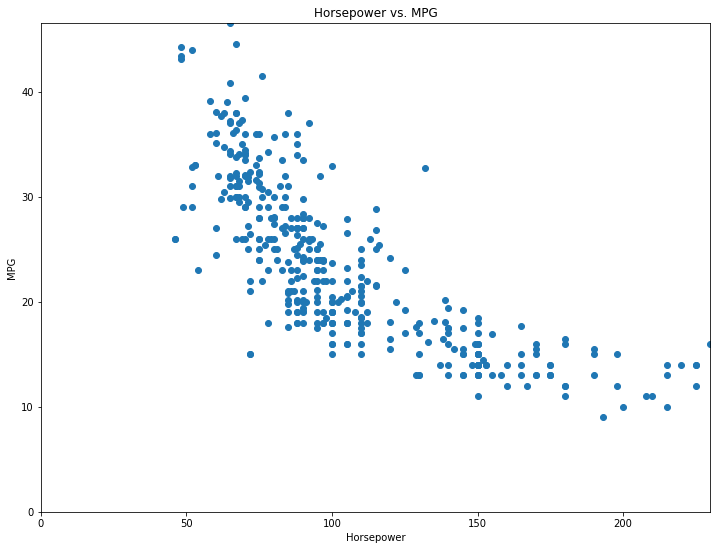

In [5]:
#STEP 3:

beta0 = 40.

#STUDENT CODE - Make a single scatterplot of horsepower (x axis) by MPG (y axis) 
# Insert the value of beta1guess based on eyeballing the graph
#---------------------------------------------  

# extract the 'horsepower' and 'mpg' columns
horsepower = data['horsepower'].values.reshape(-1,1)
mpg = data['mpg'].values.reshape(-1,1)

# plot horsepower vs mpg
plt.figure(figsize=(12,9))
plt.axis([0, horsepower.max(), 0, mpg.max()])
plt.title("Horsepower vs. MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.scatter(horsepower, mpg)

beta1guess = -0.1575 # third iteration

#--------------------------------------------- 

md(r"Guess for $\beta_1$ = %f" %beta1guess)

#### Parameter Estimate

My guess for $\beta_1$ is -0.1585 ~~-0.1575~~ ~~-0.15~~ ~~-0.20~~.

## STEP 4:
Make a `numpy` array of possible $\beta_1$ values(`beta1bracket`) surrounding your guess $\beta_1$ for to test & display the values you chose

In [6]:
#STEP 4

#STUDENT CODE - Insert code to make a set of possible beta1 values to test & display the values you chose
#---------------------------------------------          

# 100 possible values centered around my 𝛽1 guess
guess_radius = 0.0075 # third iteration
num_guesses = 100
min_guess = beta1guess - guess_radius
max_guess = beta1guess + guess_radius

beta1bracket = np.linspace(min_guess, max_guess, num_guesses).reshape(-1,1)
print(beta1bracket)

#--------------------------------------------- 



[[-0.165     ]
 [-0.16484848]
 [-0.16469697]
 [-0.16454545]
 [-0.16439394]
 [-0.16424242]
 [-0.16409091]
 [-0.16393939]
 [-0.16378788]
 [-0.16363636]
 [-0.16348485]
 [-0.16333333]
 [-0.16318182]
 [-0.1630303 ]
 [-0.16287879]
 [-0.16272727]
 [-0.16257576]
 [-0.16242424]
 [-0.16227273]
 [-0.16212121]
 [-0.1619697 ]
 [-0.16181818]
 [-0.16166667]
 [-0.16151515]
 [-0.16136364]
 [-0.16121212]
 [-0.16106061]
 [-0.16090909]
 [-0.16075758]
 [-0.16060606]
 [-0.16045455]
 [-0.16030303]
 [-0.16015152]
 [-0.16      ]
 [-0.15984848]
 [-0.15969697]
 [-0.15954545]
 [-0.15939394]
 [-0.15924242]
 [-0.15909091]
 [-0.15893939]
 [-0.15878788]
 [-0.15863636]
 [-0.15848485]
 [-0.15833333]
 [-0.15818182]
 [-0.1580303 ]
 [-0.15787879]
 [-0.15772727]
 [-0.15757576]
 [-0.15742424]
 [-0.15727273]
 [-0.15712121]
 [-0.1569697 ]
 [-0.15681818]
 [-0.15666667]
 [-0.15651515]
 [-0.15636364]
 [-0.15621212]
 [-0.15606061]
 [-0.15590909]
 [-0.15575758]
 [-0.15560606]
 [-0.15545455]
 [-0.15530303]
 [-0.15515152]
 [-0.155  

## STEP 5:
Compute the sum of squared residual errors (RSS) under each possible beta1bracket member

In [8]:
#STEP 5

#STUDENT CODE - Insert code to compute the sum of squared residual errors (RSS) under each possible beta1bracket member.
#---------------------------------------------

def rss1d(beta0, beta1, x, y):
    # 2x1 matrix of beta0 and beta1
    beta = np.array([[beta0, beta1]]).T
    
    # 392x2 matrix; column of 1s and column of x values
    design = np.hstack((np.ones((len(x), 1)), x))
    
    # estimated y values
    yhat = np.dot(design, beta)
    
    # errors in y values
    ydiff = y - yhat
    
    # sum of squared error
    return np.dot(ydiff.T, ydiff)


# compute rss for each possible beta1 value
rss = np.array([])
for b in beta1bracket:
    rss = np.append(rss, rss1d(beta0, b, horsepower, mpg))

#--------------------------------------------- 

## STEP 6:
Make a new plot of $\beta_1$ values on the x axis and RSS cost on the y axis (computed in step 5). 
Label your axes and use math fonts in your labels 

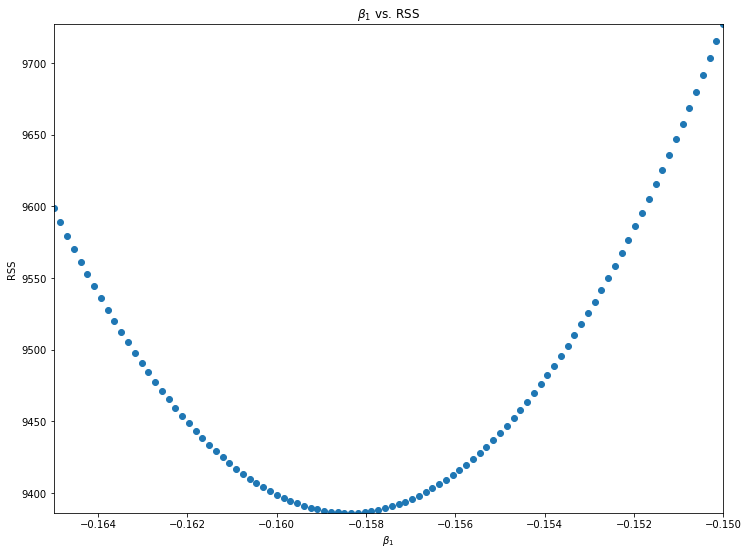

In [9]:
#STEP 6

#STUDENT CODE - make a new plot of beta_1 values on the x axis and RSS cost on the y axis (computed in step 5). 
#label your axes and use math fonts in your labels if possible
#---------------------------------------------          

plt.figure(figsize=(12,9))
plt.axis([beta1bracket.min(), beta1bracket.max(), rss.min(), rss.max()]) # using these boundaries on third iteration
plt.title(r"$\beta_1$ vs. RSS")
plt.xlabel(r"$\beta_1$")
plt.ylabel("RSS")
plt.scatter(beta1bracket, rss)

#--------------------------------------------- 

# STEP 7:   
Describe the RSS Plot

#### a. What is the shape of the plot in step 6?  

This plot is convex. It has a single local minimum, so this local minimum is also the global minimum.

#### b. Using the plot, how might someone find the best value of $\beta_1$?

One should choose the $\beta_1$ that gives the smallest RSS. In other words, one should select the $\beta_1$ at the lowest point (the minimum) of the curve.

#### c. Select & report the value of $\beta_1$ you think will have the best fit (you may want to improve your estimate by exploring near it by adding additional values for $\beta_1$  and repeating steps 3-5):

- The $\beta_1$ guesses in iteration 1 ranged from -0.4 to 0. The optimal value seemed to be about -0.16.
- The $\beta_1$ guesses in iteration 2 ranged from -0.2 to -0.1. The optimal value seemed to be about -0.155.
- The $\beta_1$ guesses in iteration 3 ranged from -0.165 to -0.15. The optimal value seemed to be about -0.1585.

I think $\beta_1\approx-0.1585$.

## STEP 8:
Build a new scatterplot with horsepower (x-axis) vs MPG (y-axis)

Add a line to the plot - the linear regression line implied by the fixed beta0=40 and your best choice for beta1

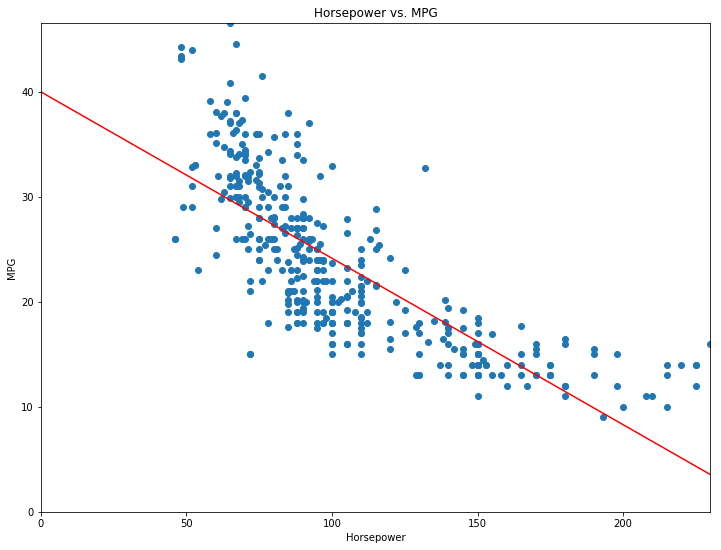

In [11]:
#STEP 8

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the fixed beta0=40 and your best choice for beta1 
#---------------------------------------------

# taken directly from in-class work
def computeLine(intercept, slope, start_x, end_x):
    points_x = [start_x, end_x]
    points_y = [intercept, intercept + slope * end_x]
    return points_x, points_y


beta1guess = -0.1585

plt.figure(figsize=(12,9))
plt.axis([0, horsepower.max(), 0, mpg.max()])
plt.title("Horsepower vs. MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.scatter(horsepower, mpg)

points_x, points_y = computeLine(beta0, beta1guess, 0, horsepower.max())
plt.plot(points_x, points_y, c='r')

#--------------------------------------------- 


## STEP 9:
Implement equation 3.4 on page 62 to develop the closed-form function `computeBetas(xVec, yVec)` 
which accepts a column vector of x values and a column vector of y values and returns betas, 
which is a structure containing the values for the 2 coefficients $\beta_0$ and $\beta_1$  

In [12]:
#STEP 9

#STUDENT CODE - In code, implement equation 3.4 on page 62 to develop the closed-form function computeBetas(xVec, yVec) 
# which accepts a column vector of x values and a column vector of y values and returns betas, 
# which is a structure containing the values for the 2 coefficients beta0 and beta1  
#---------------------------------------------          

def computeBetas(xVec, yVec):
    # vector/scalar subtraction
    x_errors = xVec - xVec.mean()
    y_errors = yVec - yVec.mean()
    
    # equation 3.4 on page 62
    beta1 = np.dot(x_errors.T, y_errors) / np.dot(x_errors.T, x_errors)
    beta0 = yVec.mean() - beta1 * xVec.mean()

    # found .item() here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.item.html
    return beta0.item(), beta1.item()

#--------------------------------------------- 

## STEP 10:
Compute and display best $\beta_0$ (`beta0best`) and $\beta_1$ (`beta1best`) for the Auto Dataset by calling the closed-form function in step 9

In [13]:
#STEP 10
#STUDENT CODE - Compute beta0best and beta1best for the Auto Dataset by calling the closed-form function in step 9
#--------------------------------------------- 

beta0best, beta1best = computeBetas(horsepower, mpg)
print(beta0best, beta1best)

#--------------------------------------------- 

39.93586102117047 -0.15784473335365365


## STEP 11:

#### How does the closed form computed value of $\beta_1$ compare with your estimate of $\beta_1$ from step 6?

It's pretty close. I narrowed my guess to $\beta_1=-0.1585$, so my error is $\frac{|-0.1585-(-0.1578)|}{|-0.1578|}=0.0044=0.44\%$. I suppose I could've gotten a bit closer  (by further iterating over the process), but I don't think it's a big deal – my guess was good enough.

Alternatively, I could've simply identified the minimum RSS calculated and then selected the associated $\beta_1$ value. Still, my eyeball guess was close.

## STEP 12:
Build a new scatterplot with horsepower (x axis) vs MPG (y axis), then add a line to the plot - the linear regression line implied by the $\beta_0$ and $\beta_1$ you determined in step 10

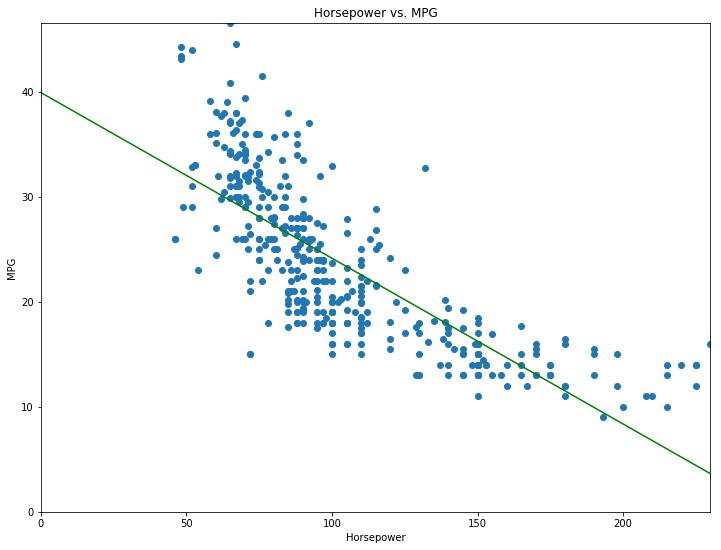

In [14]:
#STEP 12

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the beta0 and beta1 you determined in step 10 
#---------------------------------------------          

plt.figure(figsize=(12,9))
plt.axis([0, horsepower.max(), 0, mpg.max()])
plt.title("Horsepower vs. MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.scatter(horsepower, mpg)

points_x, points_y = computeLine(beta0best, beta1best, 0, horsepower.max())
plt.plot(points_x, points_y, c='g')

#--------------------------------------------- 

## STEP 13:
Use sklearn's linear model function to fit a linear model from horsepower to mpg. Then display the coefficients, MSE, and explained variance score.

In [15]:
#STEP13

#STUDENT CODE - Use sklearn's linear model function to fit a linear model from horsepower to mpg. 
# also, display the coefficients, MSE and explained variance score
#---------------------------------------------          

# fit a line to (horsepower, mpg) using sklearn
model = linear_model.LinearRegression().fit(horsepower, mpg)

# grab the (b0, b1) values
beta0exact = model.intercept_.item()
beta1exact = model.coef_[0].item()

# mse is rss / n, and we already have an rss function
mse = (rss1d(beta0exact, beta1exact, horsepower, mpg) / mpg.size).item()

# given by sklearn
explained_variance = model.score(horsepower, mpg)

print("Coefficients:\n\t", beta0exact, "\n\t", beta1exact)
print("Mean squared error:\n\t", mse)
print("Explained variance:\n\t", explained_variance)

#--------------------------------------------- 

Coefficients:
	 39.93586102117047 
	 -0.15784473335365365
Mean squared error:
	 23.943662938603108
Explained variance:
	 0.6059482578894348


## STEP 14:
Build a new scatterplot with horsepower (x axis) vs MPG (y axis), then add a line to the plot - the linear regression line implied by the sklearn model determined in step 13

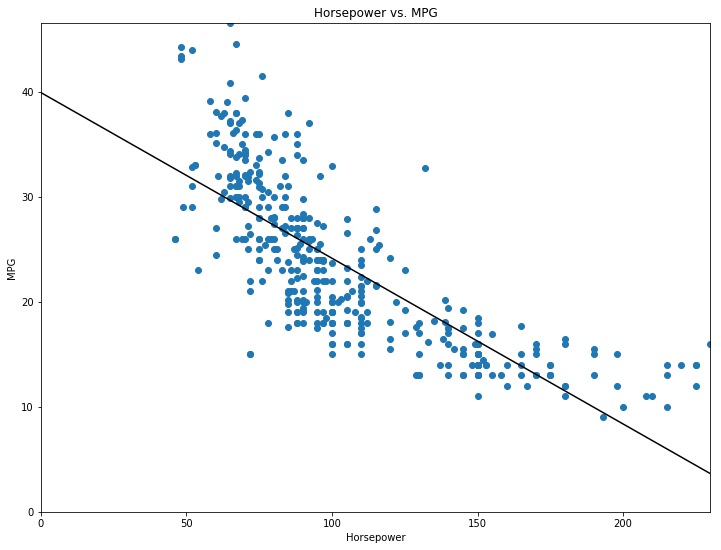

In [16]:
#STEP 14

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the sklearn model determined in step 13 
#---------------------------------------------          

plt.figure(figsize=(12,9))
plt.axis([0, horsepower.max(), 0, mpg.max()])
plt.title("Horsepower vs. MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.scatter(horsepower, mpg)

points_x, points_y = computeLine(beta0exact, beta1exact, 0, horsepower.max())
plt.plot(points_x, points_y, c='k')

#--------------------------------------------- 

## STEP 15a:
Compute the residual errors in predicting mpg from horsepower.  Plot these residual errors as a function of horsepower using a scatterplot.  Add a horizontal line at $y=0$ to indicate the zero-error position.

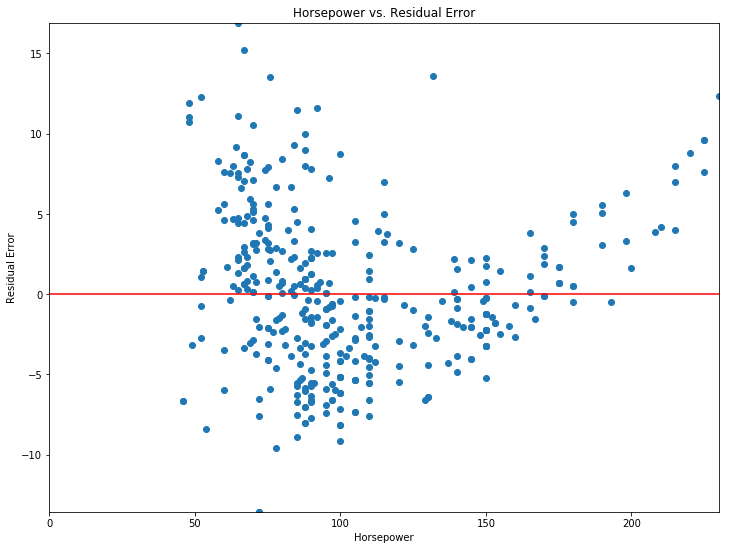

In [19]:
#STUDENT CODE

#---------------------------------------------  

# make a 2x1 matrix
exact_betas = np.array([[beta0exact, beta1exact]]).T

# make another design matrix over horsepower
design = np.hstack((np.ones((len(horsepower), 1)), horsepower))

# estimate the y values
yhat = np.dot(design, exact_betas)

# calculate the estimation errors
residual_errors = mpg - yhat

plt.figure(figsize=(12,9))
plt.axis([0, horsepower.max(), residual_errors.min(), residual_errors.max()])
plt.title("Horsepower vs. Residual Error")
plt.xlabel("Horsepower")
plt.ylabel("Residual Error")
plt.scatter(horsepower, residual_errors)

points_x, points_y = computeLine(0, 0, 0, horsepower.max())
plt.plot(points_x, points_y, c='r')

#---------------------------------------------      

## STEP 15b:

#### Do the errors appear well-distributed, or are there trends?  

The errors are not well-distributed; there are clear trends in the plot.

#### If there are trends, describe the trends.

In general, the error values are distributed parabolically. It appears that the model underestimates MPG for most horsepower values above 150 and for most values under 100. For horsepower values between 100 and 150, the model overestimates MPG. 

Some datapoints don't really follow this trend. For example, one 140 HP datapoint greatly underestimates the MPG when compared to other datapoints of about 140 HP. A few 50 HP datapoints greatly overestimate MPG relative to similar horsepower values.

#### Explain what these trends indicate about the ability to predict mpg from horsepower using a linear model.

It seems to me that Horsepower vs. MPG is simply too non-linear to successfully fit a linear model. In other words, linear models are not flexible enough for these data.

#### Give at least one course of action you could take to make a better model.

Instead of trying to fit a linear model to a non-linear relationship, we should really fit a more flexible model. One possible paradigm that might prove more accurate is KNN. I imagine KNN here would better follow the obvious curve in the Horsepower vs. MPG scatterplots.